# Causality Workshop 2025 - PNNL TechFest
## NOCAP introduction and Tutorial 
### August George and Jeremy Zucker

# Introduction: Causality for Bioengineering

* Engineer biological systems with novel capabilities (biofactories, sensors, therapeutics)

* Fill gaps in biological "parts list" and component functions

* Develop better mechanistic models despite messy data

* Leverage emerging experiments and causal analysis to advance the field


# Background: GRNs and Perturb-Seq

* Central dogma: DNA --> RNA --> Protein

* Gene Regulatory Networks (GRNs)
  * Node: gene expression, Edge: interaction

* Perturb-Seq: scRNAseq with CRISPR
  * Millions of cells, thousands of genes/cell
  * Measure RNA levels/cell
  * Perform soft interventions on genes


# NOCAP

* NOCAP: Network Optimization and Causal Analysis of Perturb-seq

* A toolkit to study perturb-seq data and gene regulatory networks (GRN) using causality

* Causal Workflow:
  * Build model
  * Simulate data and calibrate 
  * Causal queries



# Getting Started - Making a Model

* (Linear) Structural Causal Model: $X\rightarrow Y$; $Y = βX + ε$
  * Gene expression of Y, Gene expression of gene X, edge weight β, noise ε
  * Good first order approximation, but has limitations


### note: install NOCAP 
`pip install git+https://github.com/CRISPR-CARB/nocap.git`


In [9]:
# load modules for tutorial
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from IPython.display import display

import nocap

In [10]:
# loading E. coli tyrR subnetwork
tyrR_DAG = nx.read_gml("tyrR_filtered.gml")
tyrR_SCM = nocap.scm.generate_lscm_from_dag(tyrR_DAG)
display(f"Number of nodes in the DAG: {tyrR_DAG.number_of_nodes()}")
display(f"Number of edges in the DAG: {tyrR_DAG.number_of_edges()}")

'Number of nodes in the DAG: 26'

'Number of edges in the DAG: 63'

# Inspecting the Model
* Visualizing the causal graph and model equations

In [11]:
nocap.scm.plot_interactive_lscm_graph(tyrR_SCM)

In [12]:
display(nocap.scm.convert_to_latex(tyrR_SCM))

'$$cra = \\epsilon_{cra}$$\n $$rpoD = \\epsilon_{rpoD}$$\n $$glaR = \\epsilon_{glaR}$$\n $$cpxR = \\beta_{rpoD ->cpxR} rpoD + \\epsilon_{cpxR}$$\n $$fnr = \\beta_{rpoD ->fnr} rpoD + \\epsilon_{fnr}$$\n $$hupB = \\beta_{rpoD ->hupB} rpoD + \\epsilon_{hupB}$$\n $$ihfB = \\beta_{rpoD ->ihfB} rpoD + \\epsilon_{ihfB}$$\n $$lrp = \\beta_{rpoD ->lrp} rpoD + \\epsilon_{lrp}$$\n $$trpR = \\beta_{rpoD ->trpR} rpoD + \\epsilon_{trpR}$$\n $$soxR = \\beta_{fnr ->soxR} fnr + \\beta_{rpoD ->soxR} rpoD + \\epsilon_{soxR}$$\n $$ihfA = \\beta_{ihfB ->ihfA} ihfB + \\epsilon_{ihfA}$$\n $$argR = \\beta_{lrp ->argR} lrp + \\beta_{rpoD ->argR} rpoD + \\epsilon_{argR}$$\n $$nac = \\beta_{fnr ->nac} fnr + \\beta_{lrp ->nac} lrp + \\epsilon_{nac}$$\n $$tyrR = \\beta_{lrp ->tyrR} lrp + \\beta_{rpoD ->tyrR} rpoD + \\epsilon_{tyrR}$$\n $$hupA = \\beta_{nac ->hupA} nac + \\epsilon_{hupA}$$\n $$aroF = \\beta_{nac ->aroF} nac + \\beta_{rpoD ->aroF} rpoD + \\beta_{soxR ->aroF} soxR + \\beta_{tyrR ->aroF} tyrR + \\epsi

$$cra = \epsilon_{cra}$$
 $$rpoD = \epsilon_{rpoD}$$
 $$glaR = \epsilon_{glaR}$$
 $$cpxR = \beta_{rpoD ->cpxR} rpoD + \epsilon_{cpxR}$$
 $$fnr = \beta_{rpoD ->fnr} rpoD + \epsilon_{fnr}$$
 $$hupB = \beta_{rpoD ->hupB} rpoD + \epsilon_{hupB}$$
 $$ihfB = \beta_{rpoD ->ihfB} rpoD + \epsilon_{ihfB}$$
 $$lrp = \beta_{rpoD ->lrp} rpoD + \epsilon_{lrp}$$
 $$trpR = \beta_{rpoD ->trpR} rpoD + \epsilon_{trpR}$$
 $$soxR = \beta_{fnr ->soxR} fnr + \beta_{rpoD ->soxR} rpoD + \epsilon_{soxR}$$
 $$ihfA = \beta_{ihfB ->ihfA} ihfB + \epsilon_{ihfA}$$
 $$argR = \beta_{lrp ->argR} lrp + \beta_{rpoD ->argR} rpoD + \epsilon_{argR}$$
 $$nac = \beta_{fnr ->nac} fnr + \beta_{lrp ->nac} lrp + \epsilon_{nac}$$
 $$tyrR = \beta_{lrp ->tyrR} lrp + \beta_{rpoD ->tyrR} rpoD + \epsilon_{tyrR}$$
 $$hupA = \beta_{nac ->hupA} nac + \epsilon_{hupA}$$
 $$aroF = \beta_{nac ->aroF} nac + \beta_{rpoD ->aroF} rpoD + \beta_{soxR ->aroF} soxR + \beta_{tyrR ->aroF} tyrR + \epsilon_{aroF}$$
 $$aroG = \beta_{cpxR ->aroG} cpxR + \beta_{lrp ->aroG} lrp + \beta_{rpoD ->aroG} rpoD + \beta_{tyrR ->aroG} tyrR + \epsilon_{aroG}$$
 $$aroL = \beta_{rpoD ->aroL} rpoD + \beta_{trpR ->aroL} trpR + \beta_{tyrR ->aroL} tyrR + \epsilon_{aroL}$$
 $$aroM = \beta_{rpoD ->aroM} rpoD + \beta_{trpR ->aroM} trpR + \beta_{tyrR ->aroM} tyrR + \epsilon_{aroM}$$
 $$aroP = argR \beta_{argR ->aroP} + \beta_{cra ->aroP} cra + \beta_{fnr ->aroP} fnr + \beta_{glaR ->aroP} glaR + \beta_{rpoD ->aroP} rpoD + \beta_{tyrR ->aroP} tyrR + \epsilon_{aroP}$$
 $$folA = \beta_{ihfA ->folA} ihfA + \beta_{ihfB ->folA} ihfB + \beta_{rpoD ->folA} rpoD + \beta_{tyrR ->folA} tyrR + \epsilon_{folA}$$
 $$tyrA = \beta_{rpoD ->tyrA} rpoD + \beta_{soxR ->tyrA} soxR + \beta_{tyrR ->tyrA} tyrR + \epsilon_{tyrA}$$
 $$tyrB = \beta_{rpoD ->tyrB} rpoD + \beta_{tyrR ->tyrB} tyrR + \epsilon_{tyrB}$$
 $$yaiA = \beta_{rpoD ->yaiA} rpoD + \beta_{trpR ->yaiA} trpR + \beta_{tyrR ->yaiA} tyrR + \epsilon_{yaiA}$$
 $$mtr = \beta_{hupA ->mtr} hupA + \beta_{hupB ->mtr} hupB + \beta_{ihfA ->mtr} ihfA + \beta_{ihfB ->mtr} ihfB + \beta_{lrp ->mtr} lrp + \beta_{rpoD ->mtr} rpoD + \beta_{trpR ->mtr} trpR + \beta_{tyrR ->mtr} tyrR + \epsilon_{mtr}$$
 $$tyrP = \beta_{hupA ->tyrP} hupA + \beta_{hupB ->tyrP} hupB + \beta_{ihfA ->tyrP} ihfA + \beta_{ihfB ->tyrP} ihfB + \beta_{lrp ->tyrP} lrp + \beta_{rpoD ->tyrP} rpoD + \beta_{tyrR ->tyrP} tyrR + \epsilon_{tyrP}$$

# Model Simulation
* Generating synthetic perturb-seq data

,cra,rpoD,glaR,cpxR,fnr,hupB,ihfB,lrp,trpR,soxR,...,aroG,aroL,aroM,aroP,folA,tyrA,tyrB,yaiA,mtr,tyrP
0,1.207082,0.202369,0.860481,1.657164,1.810720,1.936836,0.598545,0.000000,0.620966,0.817183,...,0.000000,0.510618,2.136326,2.279943,0.876497,1.322237,0.000000,0.509707,2.521732,3.103282
1,0.000000,0.000000,0.000000,0.733952,1.134418,0.000000,0.604285,0.461827,0.627086,1.723551,...,0.330324,1.729255,0.998825,0.000000,0.105589,1.623849,0.672395,1.062938,1.809957,0.000000
2,1.024686,0.762840,0.920979,1.178120,1.406400,1.856698,0.644083,1.091693,2.294403,1.712072,...,2.764952,2.461991,3.609773,3.860004,5.645191,2.510926,2.064741,1.425853,7.681225,4.867853
3,0.185800,0.000000,0.000000,0.713982,0.787107,0.856060,1.211491,0.000000,0.664558,0.757916,...,0.000000,0.000000,0.874113,0.788076,2.824718,1.706307,0.000000,0.000000,1.496377,0.809918
4,0.000000,0.782985,0.000000,1.894493,2.806226,2.055497,1.241784,1.207996,0.000000,2.023261,...,2.841617,2.546815,2.070027,2.078085,1.525536,2.620731,1.299994,0.385450,4.404967,6.888968


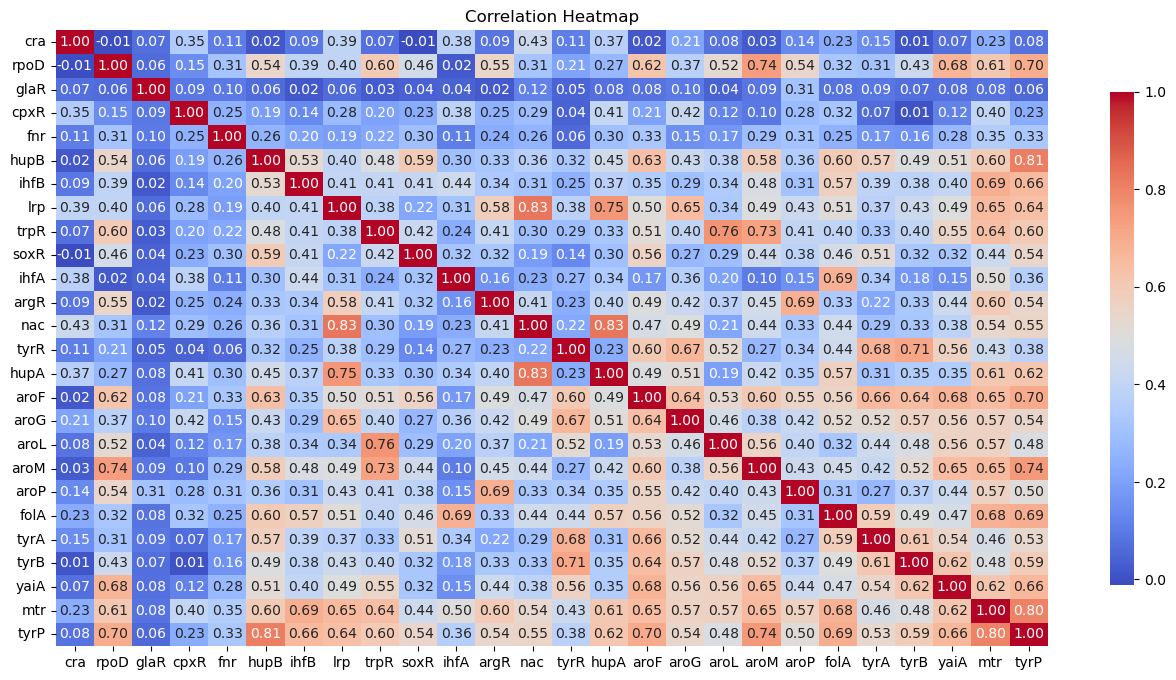

In [13]:
# Simulate data from the model
compiled_lgbn_model = nocap.scm.compile_lgbn_from_lscm(tyrR_SCM)  # Linear Gaussian Bayesian Network
simulated_data = nocap.simulate_data_with_outliers(compiled_lgbn_model, num_samples=1000)
display(simulated_data.head())

# Plot the heatmap
corr_matrix = simulated_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.show()

# Model Calibration
* Learning model parameters from data
* Conditional probability distributions for each node are learned

In [14]:
# run inverse modeling (parameter estimation)
calibrated_lgbn_model = nocap.scm.fit_model(
    compiled_lgbn_model, simulated_data, backend="pgmpy", method="mle"
)
display(calibrated_lgbn_model.cpds)
simulated_data_after_calibration = nocap.simulate_data_with_outliers(
    calibrated_lgbn_model, num_samples=1000
)

[<LinearGaussianCPD: P(cra) = N(0.45; 0.898) at 0x3280b43d0,
 <LinearGaussianCPD: P(rpoD) = N(0.426; 0.428) at 0x329ceb1d0,
 <LinearGaussianCPD: P(glaR) = N(0.389; 0.368) at 0x32a19d850,
 <LinearGaussianCPD: P(cpxR | rpoD) = N(0.3*rpoD + 0.985; 1.78) at 0x329cb9ed0,
 <LinearGaussianCPD: P(fnr | rpoD) = N(0.446*rpoD + 0.791; 0.801) at 0x3281131d0,
 <LinearGaussianCPD: P(hupB | rpoD) = N(1.132*rpoD + 0.491; 1.335) at 0x32a1a21d0,
 <LinearGaussianCPD: P(ihfB | rpoD) = N(0.738*rpoD + 0.546; 1.277) at 0x32a1e0650,
 <LinearGaussianCPD: P(lrp | rpoD) = N(0.783*rpoD + 0.405; 1.388) at 0x324ab1990,
 <LinearGaussianCPD: P(trpR | rpoD) = N(1.068*rpoD + 0.713; 0.876) at 0x32a23ee50,
 <LinearGaussianCPD: P(soxR | rpoD, fnr) = N(0.811*rpoD + 0.239*fnr + 0.693; 1.336) at 0x328113c50,
 <LinearGaussianCPD: P(ihfA | ihfB) = N(0.516*ihfB + 0.788; 1.705) at 0x32a1efe90,
 <LinearGaussianCPD: P(argR | rpoD, lrp) = N(0.644*rpoD + 0.375*lrp + 0.283; 0.687) at 0x32a1ed590,
 <LinearGaussianCPD: P(nac | fnr, lrp

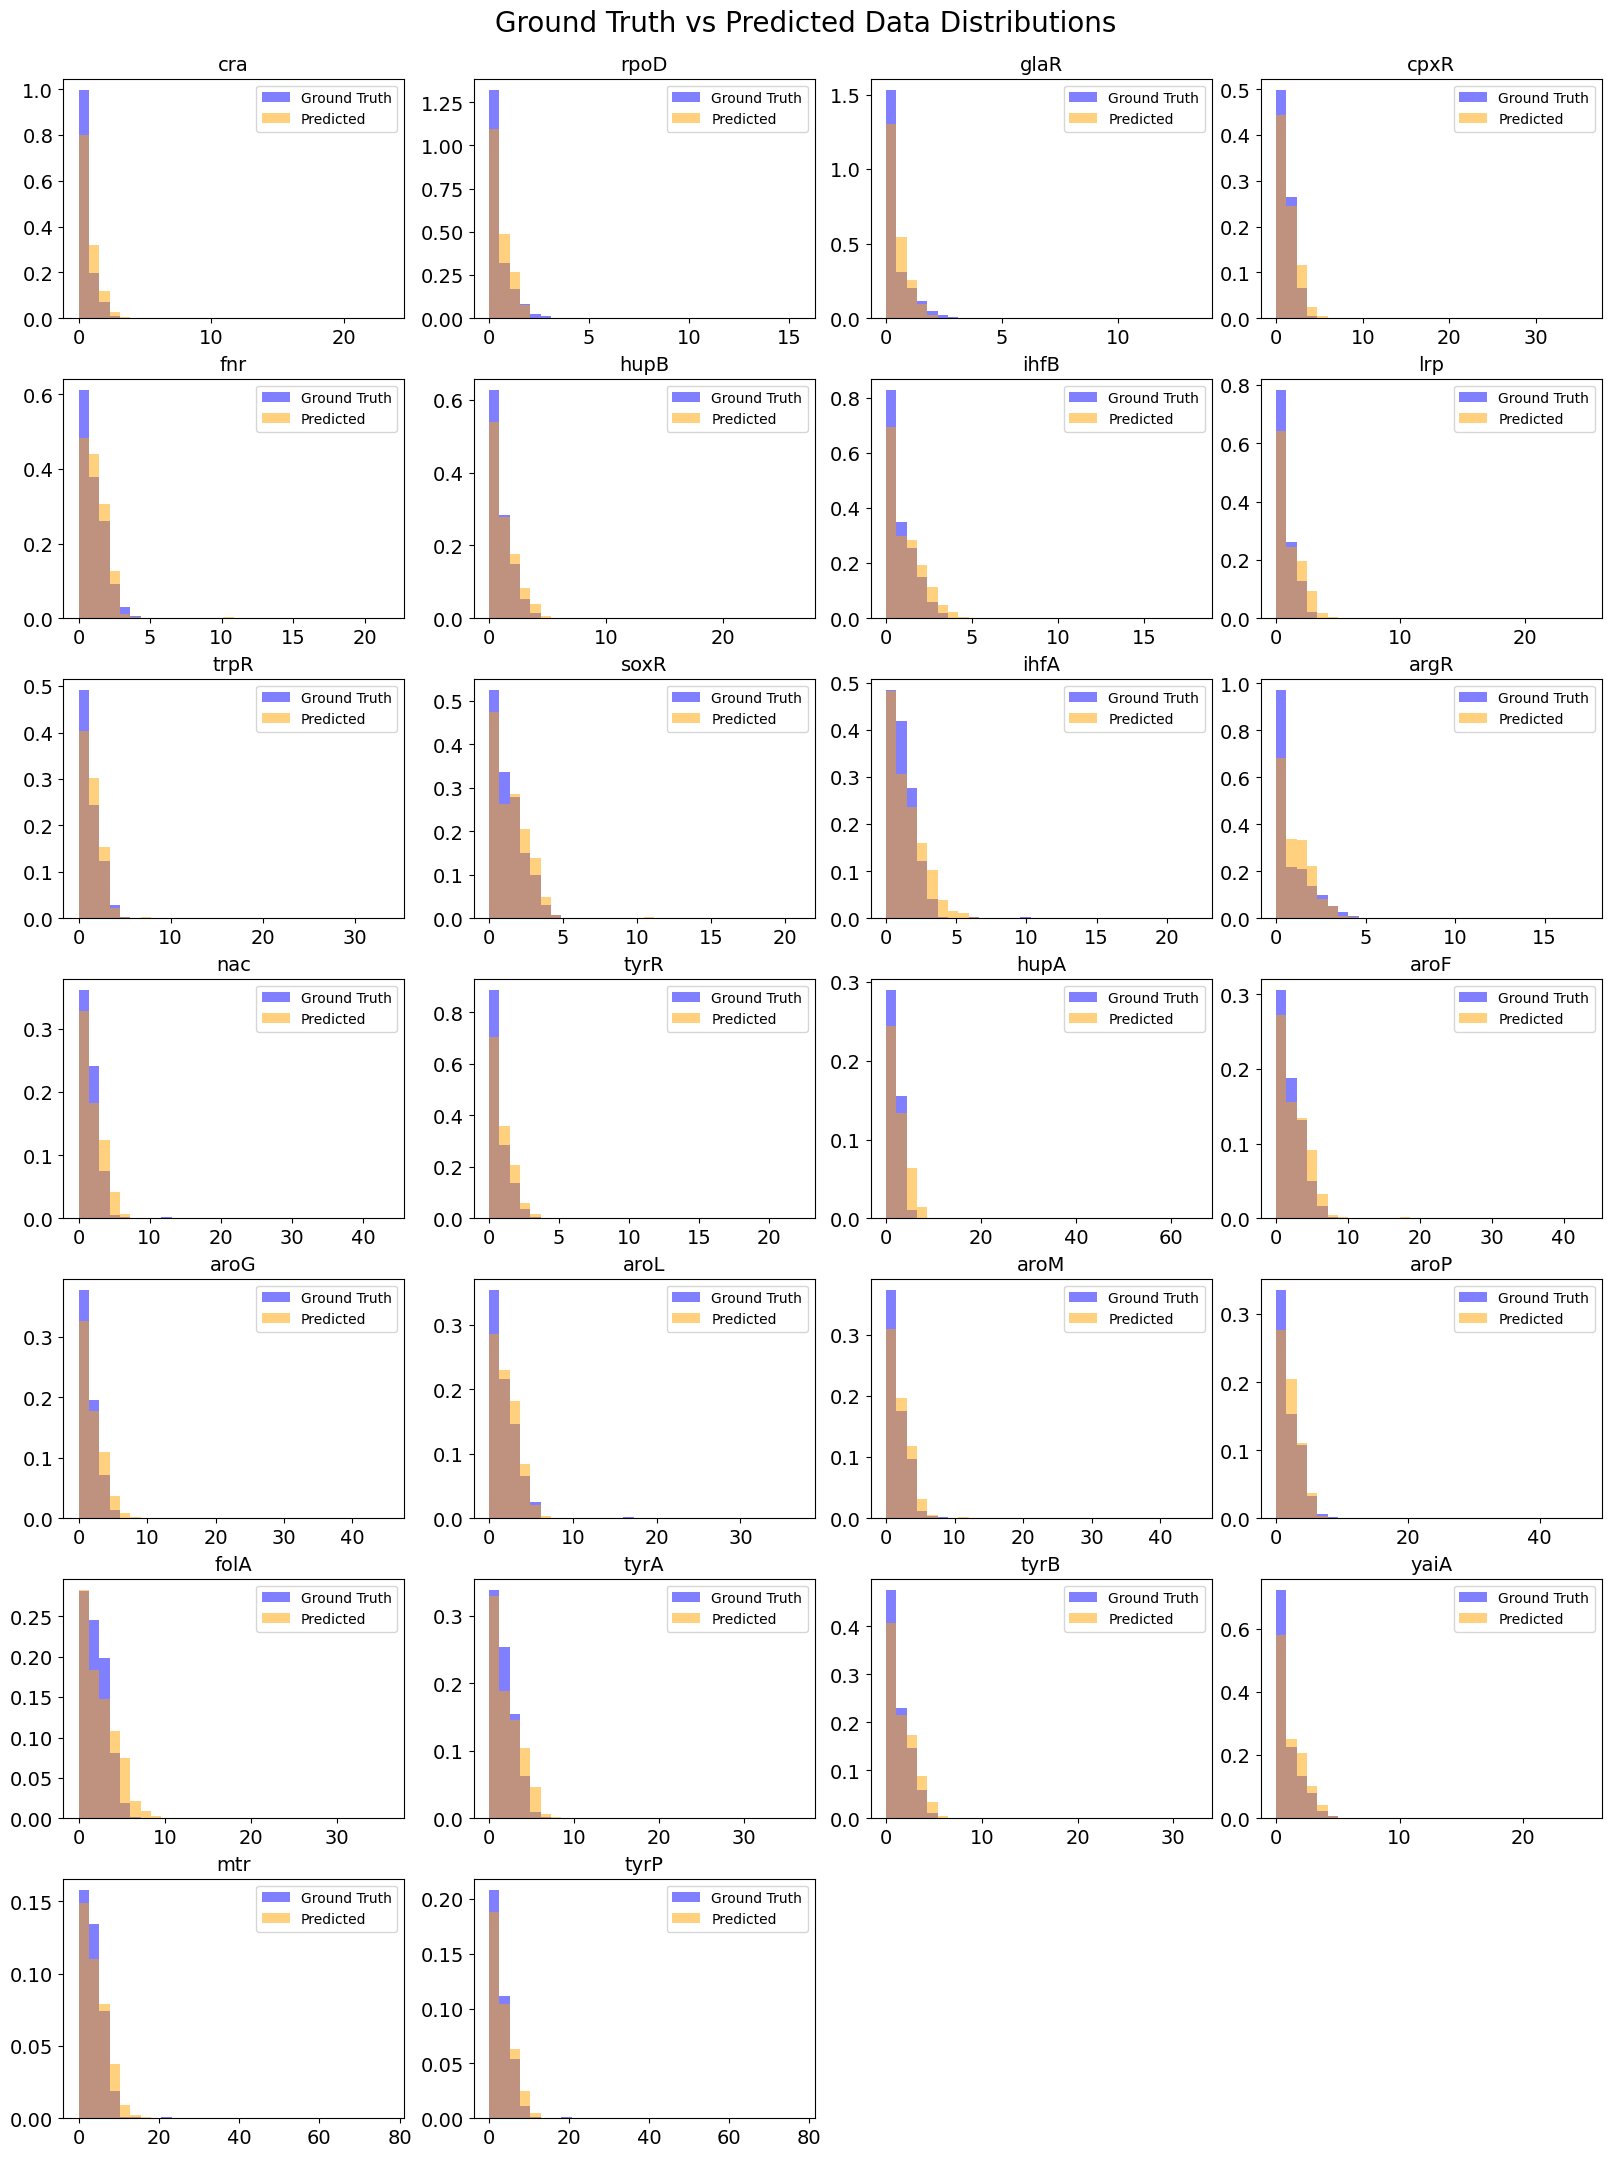

In [15]:
# Plot histograms for each column: original vs predicted data
num_cols = simulated_data_after_calibration.shape[1]
ncols = 4
nrows = int(np.ceil(num_cols / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows), constrained_layout=True)

for idx, col in enumerate(simulated_data.columns):
    ax = axes.flat[idx]
    # Compute combined min/max for consistent bins
    data_min = min(simulated_data[col].min(), simulated_data_after_calibration[col].min())
    data_max = max(simulated_data[col].max(), simulated_data_after_calibration[col].max())
    bins = np.linspace(data_min, data_max, 31)
    ax.hist(simulated_data[col], bins=bins, alpha=0.5, label="Ground Truth", color="blue", density=True)
    ax.hist(
        simulated_data_after_calibration[col],
        bins=bins,
        alpha=0.5,
        label="Predicted",
        color="orange",
        density=True,
    )
    ax.set_title(col)
    ax.legend()

# Hide any unused subplots
for j in range(idx + 1, nrows * ncols):
    axes.flat[j].set_visible(False)

fig.suptitle("Ground Truth vs Predicted Data Distributions", y=1.02, fontsize=20)
for ax in axes.flat:
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
    ax.tick_params(axis="both", labelsize=14)  # Increase tick label font size
    legend = ax.get_legend()
    if legend is not None:
        for text in legend.get_texts():
            text.set_fontsize(10)
plt.show()

# Investigating Intervention Effects
* Average Treatment Effect (ATE): 
    * Genetic activation of gene X has what ATE on gene Y?


In [16]:
ate = nocap.scm.estimate_ate(tyrR_DAG, simulated_data, "tyrR", "tyrA")
display(ate)

1.3194272093106891

# Next Steps:

NOCAP is under active development:
* Analysis of dynamic time series data and interventions
* Causal model discovery and repair
* Robust probabilistic models with noise
* Additional backends

If you are interested in causality for single cell biology, please reach out!
* August George: august.george@pnnl.gov 
* Jeremy Zucker: jeremy.zucker@pnnl.gov 

GitHub: https://github.com/CRISPR-CARB/nocap 



# Thanks

NOCAP Team
* Mridula Gupta
* Yichao Han
* Narmadha Mohankumar
* Jeremy Zucker
* Alex Beliaev

Causality Workshop Team
* Shant Mahserejian
* Sabina Altus
* Caleb Warwick
* Winston Anthony

Funding:
* J.Z. and A.G. were supported in part by award number DE-SC0023091 under the DOE Biosystems Design program.
